In [2]:
import numpy as np
import sys, os
from PIL import Image
import matplotlib.pyplot as plt

(44, 256, 256)
255
0
(40, 256, 256)
255
0


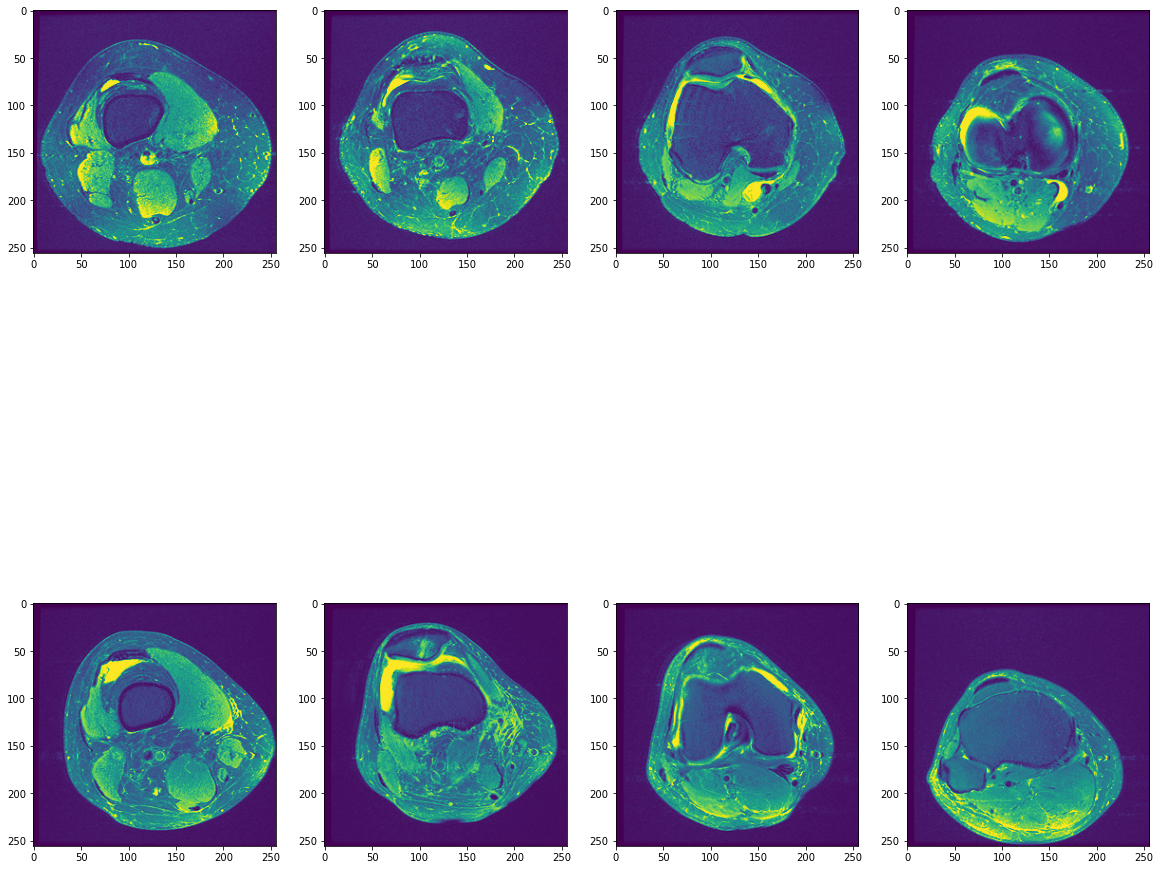

In [16]:
example1 = np.load("./MRNet-v1.0/MRNet-v1.0/train/axial/0000.npy")
example2 = np.load("./MRNet-v1.0/MRNet-v1.0/train/axial/0905.npy")

print(example1.shape)
print(np.amax(example1))
print(np.amin(example1))
print(example2.shape)
print(np.amax(example2))
print(np.amin(example2))

fig, axs = plt.subplots(2, 4, figsize=(20, 20))
axs[0, 0].imshow(example1[0, :, :])
axs[0, 1].imshow(example1[10, :, :])
axs[0, 2].imshow(example1[20, :, :])
axs[0, 3].imshow(example1[30, :, :])

axs[1, 0].imshow(example2[0, :, :])
axs[1, 1].imshow(example2[10, :, :])
axs[1, 2].imshow(example2[20, :, :])
axs[1, 3].imshow(example2[29, :, :])

(36, 256, 256)
255
0
(34, 256, 256)
255
0


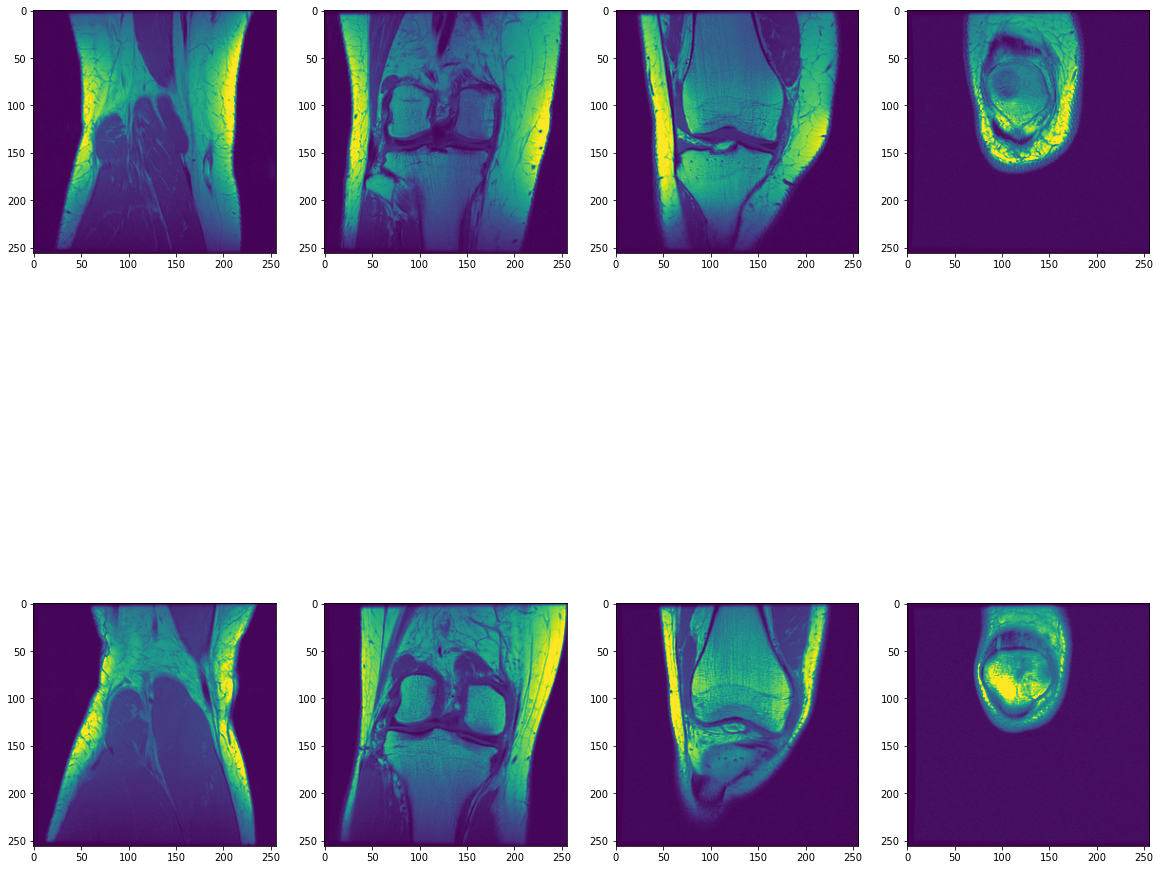

In [18]:
example3 = np.load("./MRNet-v1.0/MRNet-v1.0/train/coronal/0000.npy")
example4 = np.load("./MRNet-v1.0/MRNet-v1.0/train/coronal/0905.npy")

print(example3.shape)
print(np.amax(example3))
print(np.amin(example3))
print(example4.shape)
print(np.amax(example4))
print(np.amin(example4))

fig, axs = plt.subplots(2, 4, figsize=(20, 20))
axs[0, 0].imshow(example3[0, :, :])
axs[0, 1].imshow(example3[10, :, :])
axs[0, 2].imshow(example3[20, :, :])
axs[0, 3].imshow(example3[30, :, :])

axs[1, 0].imshow(example4[0, :, :])
axs[1, 1].imshow(example4[10, :, :])
axs[1, 2].imshow(example4[20, :, :])
axs[1, 3].imshow(example4[30, :, :])

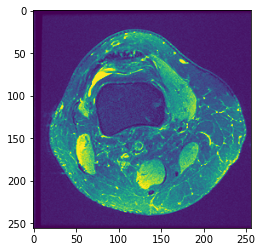

In [4]:
example_translated = np.roll(example, shift = 3, axis = 2)
plt.imshow(example_moved[10,:,:])

In [24]:
example_pil = Image.fromarray(example[10,:,:])
print(type(example[10, 0, 0]))

<class 'numpy.uint8'>


In [32]:
example_pil_rotated1 = example_pil.rotate(angle=10, fillcolor=10)
example_pil_rotated2 = example_pil.rotate(angle=10, fillcolor=0)

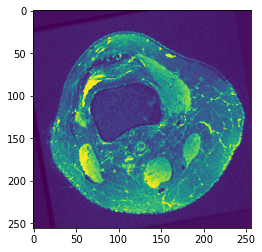

In [33]:
example_pil_rotated_np_1 = np.array(example_pil_rotated1)
plt.imshow(example_pil_rotated_np_1)

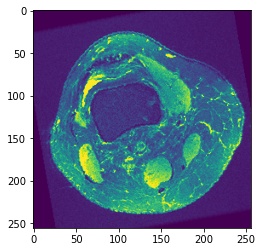

In [35]:
example_pil_rotated_np_2 = np.array(example_pil_rotated2)
plt.imshow(example_pil_rotated_np_2)

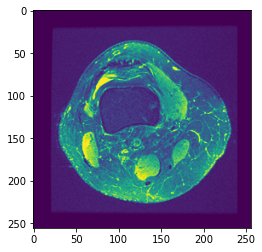

In [46]:
scaled_down_size = (224, 224)
example_pil_scale_down = example_pil.resize(scaled_down_size)
example_pil_scale_down_np = np.array(example_pil_scale_down)
example_pil_scale_down_np = np.pad(example_pil_scale_down_np, ((16, 16), (16, 16)))
plt.imshow(example_pil_scale_down_np)

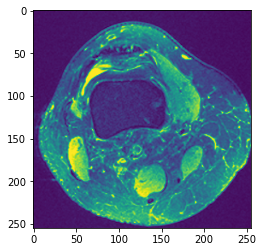

In [43]:
scaled_up_size = (280, 280)
example_pil_scale_up = example_pil.resize(scaled_up_size)
example_pil_scale_up_np = np.array(example_pil_scale_up)
example_pil_scale_up_np = example_pil_scale_up_np[11:266, 11:266]
plt.imshow(example_pil_scale_up_np)

In [58]:
def substituteZero(img_arr):
#     for row in img_arr:
#         for value in row:
#             if value == 0:
#                 value = 15
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            if img_arr[i][j] <= 2:
                img_arr[i][j] = 15

Text(0.5, 1.0, 'zoom in')

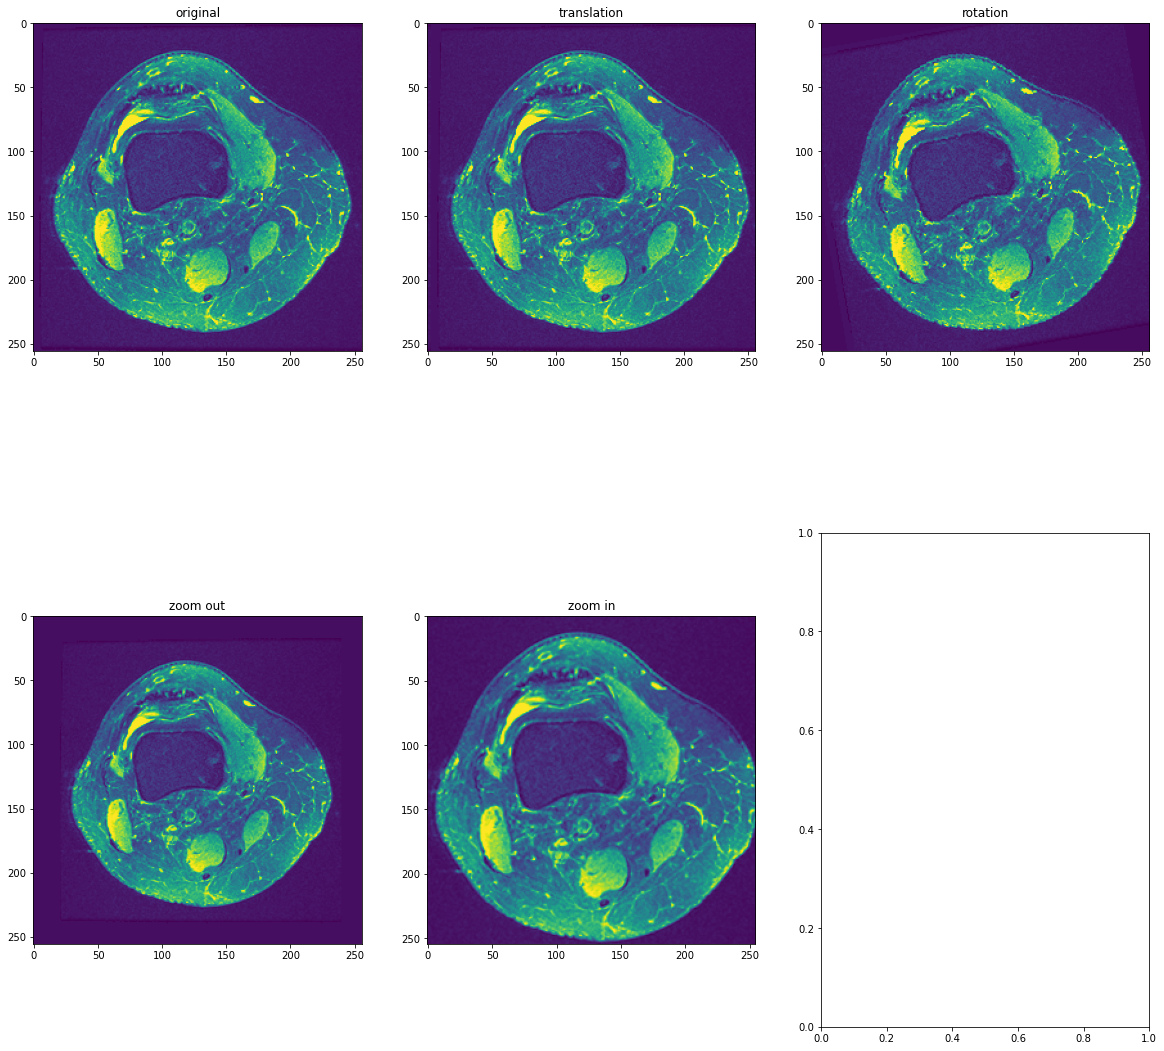

In [74]:
example_slice = example[10,:,:]
substituteZero(example_slice)
example_slice_moved = example_moved[10,:,:]
substituteZero(example_slice_moved)
substituteZero(example_pil_rotated_np_1)
substituteZero(example_pil_scale_down_np)
substituteZero(example_pil_scale_up_np)

fig, axs = plt.subplots(2, 3, figsize=(20, 20))
axs[0, 0].imshow(example_slice)
axs[0, 0].set_title("original")
axs[0, 1].imshow(example_slice_moved)
axs[0, 1].set_title("translation")
axs[0, 2].imshow(example_pil_rotated_np_1)
axs[0, 2].set_title("rotation")
axs[1, 0].imshow(example_pil_scale_down_np)
axs[1, 0].set_title("zoom out")
axs[1, 1].imshow(example_pil_scale_up_np)
axs[1, 1].set_title("zoom in")